# U.S. Medical Insurance Costs

## Estudo de caso para descobrir relações entre os valores cobrados do seguro de vida com a alguns índices dos clientes


## Parte 1: Analisandos os dados fornecidos

Na primeira parte deste estudo de caso focaremos em analisar os dados que foram fornecidos. 
Os dados (insurance.csv) foram obtidos no site Kaggle: https://www.kaggle.com/mirichoi0218/insurance

In [1]:
#importando as bibliotecas que serão usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#abrindo o dataset
df = pd.read_csv('insurance.csv')

In [3]:
#descobrindo qual o número de linhas e colunas
df.shape

(1338, 7)

Os dados foram analisados de um banco de dados de uma empresa de seguro de vida. O cálculo da cobrança não foi fornecido, no entanto existem outras variáveis que foram usadas para chegar nos valores cobrados. Veremos mais adiante que será possível calcular esse valores cobrados com o modelo de regressão usando machine learning. 
 
Cada linha, ou amostra, consiste das seguintes variáveis
 
* **age:** Idade do beneficiário principal
* **sex:** Sexo do cliente
* **bmi:** Índice de massa corporal do cliente. BMI é uma medida do peso de uma pessoa no que diz respeito a sua altura. 
* **children:** Números de crianças em dependência do cliente
* **smoker:** fumante
* **region:** Região do qual o cliente faz parte
* **charges:** Cobrança anual de quanto o cliente deve pagar

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


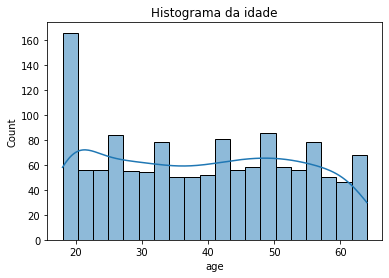

In [5]:
#Criando um histograma de distribuição de idade
sns.histplot(df['age'], bins=20, kde=True).set_title("Histograma da idade")
plt.show()

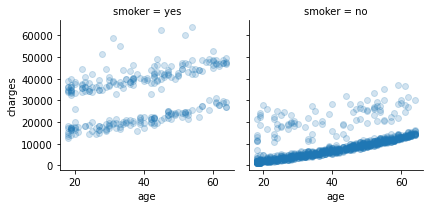

In [6]:
#PLotando o gráfico com relação entre idade e cobrança para fumantes e não fumantes
sns.FacetGrid(df, col="smoker").map(plt.scatter, "age", "charges", alpha=0.2).add_legend()
plt.show()

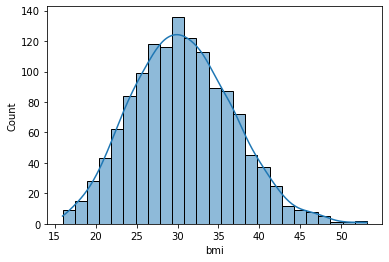

In [7]:
#Histograma de distribução de bmi
sns.histplot(df['bmi'], kde=True)
plt.show()

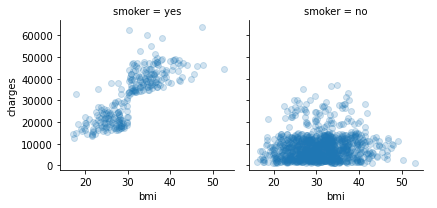

In [8]:
#Plotando o gráfico entre bmi x cobrança
sns.FacetGrid(df, col="smoker").map(plt.scatter, "bmi", "charges", alpha=0.2).add_legend()
plt.show()

Dando uma primeira olhada nos dados fornecidos e alguns gráficos plotados, podemos ver que provavelmente existem relações entre as variáveis fornecidas e o valor da cobrança. A seguir iremos investigar

## Parte 2: Regressão Linear

Iremos inicialmente focar em modelos de regressão onde o valor cobrado (charges) é a variável dependente. Ou seja, iremos prever o valor cobrado a partir de outras variáveis. 
 
Desde que "charges" é uma variável quantitativa, iremos modelá-la usando a regressão linear. 
 
### Interpretando parâmetros de regressão em um modelo básico
 
Começaremos com um modelo simples de regressão linear com apenas uma covariável, idade ("age"), prevendo "charges". O modelo que é ajustado no próximo bloco é expressa o valor cobrado como uma função linear da idade

In [9]:
#Modificandos as variávies para trabalhar com números do modelo de regressão 
df['smoker'] = df.smoker.replace({'no':0, 'yes':1})
df['region'] = df.region.replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df['sex'] = df.sex.replace({'female':0, 'male':1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [10]:
modelo = sm.OLS.from_formula("charges ~ age", data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           4.89e-29
Time:                        00:04:15   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A parte que começa a ser relevante para nós dos dados apresentados é a partir do __coef__. Nessa seção contém os valores estimados para os parâmetros do modelo de regressão. Seu padrão, erros e outros valores são usados para quantificar a incerteza nas estimativas dos parâmetros de regressão.  
 
Este modelo ajustado implica que quando comparando duas pessoas com idades diferentes em um ano, a pessoa mais velha terá em média 257, 72 unidades de "charges" maior que a pessoa mais jovem. 
Esta diferença é estatisticamente significativa, com base no valor-p mostrando na coluna rotulada __'P>|t|'__. Isso significa que há uma forte evidência de que existe uma associação real entre a idade e cobranças feitas do cliente. 
 
Para melhor entendermos o significado do parâmetro de regressão 257.7226, podemos olhar para o desvio padrão das cobranças. 


In [11]:
df.charges.std()

12110.011236694001

O desvio padrão de cerca de $12110 é grande em comparação com a inclinação da regressão de 258. No entanto, a inclinação da regressão corresponde à mudança média na cobrança para um único ano de idade, e este efeito se acumula com a idade. Comparando uma pessoa de 40 anos com uma pessoa de 60 anos, há uma diferença de 20 anos, que se traduz em '20 * 258 = 5160' diferença de unidade na média de valor cobrado entre estas duas pessoas. Essa diferença é cerca de menos da metade de um desvio padrão, e geralmente é considerado uma mudança importante e significativa.
 
### R-quadrado
 
No caso de regressão com uma única variável independente, como temos aqui, há uma correspondência muito próxima entre a análise de regressão e uma análise de correlação de Pearson. 
O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. O valor obtido foi de 0.09, isso significa que 9% da variação do valor cobrado é explicado pela idade dos clientes.
 
### Adicionando mais variáveis ao modelo
 
Feito a análise para o modelo simples de regressão linear com somente uma covariante(age) vamos utilizar todas as variáveis. O real poder da regressão acontece quando temos mais de uma covariante para prever uma saída. 


In [12]:
modelo = sm.OLS.from_formula('charges ~ age + sex + bmi + children + smoker + region', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:04:20   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.323e+04   1076.023    -12.295      0.000   -1.53e+04   -1.11e+04
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region       353.6400    151.927      2.328      0.020      55.598     651.682
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo que foi ajustado acima usa todos os parâmetros para explicar a variação do valor cobrado (charges). 
Podemos ver o quão interessante fica o valor do R-quadrado. Se olhamos a tabela, veremos um valor de 0.75, ou seja, temos uma modelo de regressão linear que 75%  da variação do valor cobrado provavelmente é explicado pelas variáveis fornecidas. 
 
Olhando o coeficiente da idade não houve mudanças mesmo adicionando muitas outras variáveis. Desse modo podemos notar que a variável de idade não tem relação com as outras variáveis fornecidas no modelo. 
É possível confirmar esse resultado olhando o valor das correções entre as variáveis e notar que quase não há relação entre idade com o resto das outras variáveis. 


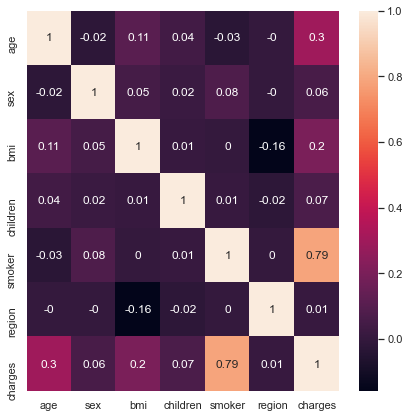

In [13]:
#correlação entre as variáveis
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Vemos que há uma forte relação entre o coeficiente de 'smokers' e o valor cobrado que como a maioria das outras variáveis podemos afirmar que elas são suficientes para induzir diferenças bastante substanciais no coeficientes de regressão. 
Voltando para a análise do valor-p podemos ver que o valor-9 para o gênero do cliente é muito grande, concluindo assim que essa variáveis provavelmente não há relação alguma com o valor cobrado pelo cliente.
 
## Parte 3: Visualização dos modelos ajustados
 
Agora iremos focar em demonstrar algumas técnicas de gráficos que podem ser usados para obter uma melhor compreensão de um modelo de regressão que foi ajustado aos dados.
 
Começamos com gráficos que nos permitem visualizar a função de regressão ajustada, ou seja, o valor cobrado do seguro de vida em função das variáveis. Esses gráficos ajudam a mostrar a função estimada de uma variável quando as outras variáveis são mantidas fixas. Também traçaremos 95% de intervalo de confiança em torno dessas linhas ajustadas. Embora a curva média estimada nunca seja exata com base em uma amostra finita de dados, podemos ter 95% de certeza de que a curva média verdadeira cai em algum lugar dentro das regiões sombreadas no gráfico mostrado. 
 
Este tipo de gráfico requer que fixamos os valores de todas as variáveis, exceto a variável independente, e uma variável independente que chamamos de variável de foco
Abaixo fixamos o gênero como feminino, o BMI como 25, smoker sim, região 1, filhos 0.

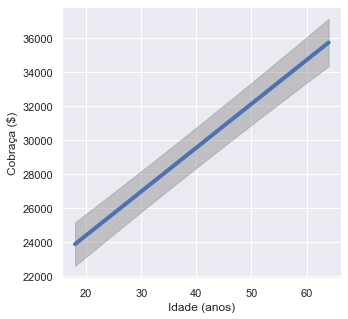

In [14]:
from statsmodels.sandbox.predict_functional import predict_functional

# Foi fixados algumas variáveis.
valores = {"sex": 0, "children": 0, "bmi": 25,
          "region": 1, "smoker": 1}

# Os valores retornados são os valores previstos (pr), as bandas de confiança (cb) e os valores da função (fv).
pr, cb, fv = predict_functional(resultado, "age",
                values=valores, ci_method="simultaneous")
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Idade (anos)")
_ = ax.set_ylabel("Cobraça ($)")

A plotagem analisada para a quantidade de filhos é mostrada a seguir. A idade é 50 com os outros parâmetros os mesmo. 

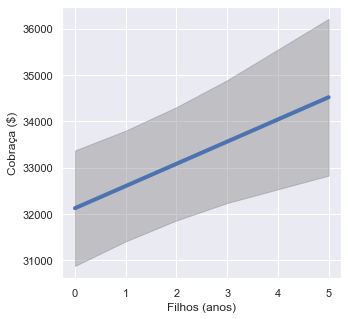

In [15]:

valores = {"sex": 0, "bmi": 25, "age": 50,
          "region": 1, "smoker": 1}

pr, cb, fv = predict_functional(resultado, "children",
                values=valores, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Filhos (anos)")
_ = ax.set_ylabel("Cobraça ($)")

A banda de erro para a quantidade de filhos é notavelmente maior que a banda de erro para a idade, indicando que há menos certeza em relação entre children e charge comparado entre idade e charge.
 
Agora vamos plotar o gráfico de resíduos no modelo ajustado:

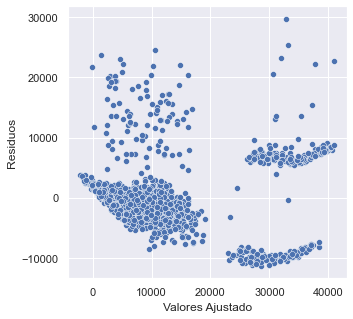

In [16]:
pp = sns.scatterplot(x=resultado.fittedvalues, y=resultado.resid)
pp.set_xlabel("Valores Ajustado")
_ = pp.set_ylabel("Residuos")

Vemos que o gráficos dos resíduos vs valores ajustados não mostra ter uma variância constante, o que, mesmo tendo um R-quadrado de 75% ele não é tão bom para um modelo de múltipla regressão. 